In [10]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import scipy.stats as stats

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

from pmdarima import auto_arima

In [2]:
df = pd.read_csv("MaunaLoaDailyTemps.csv", index_col="DATE", parse_dates=True)
df = df.asfreq("D").ffill()

df.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


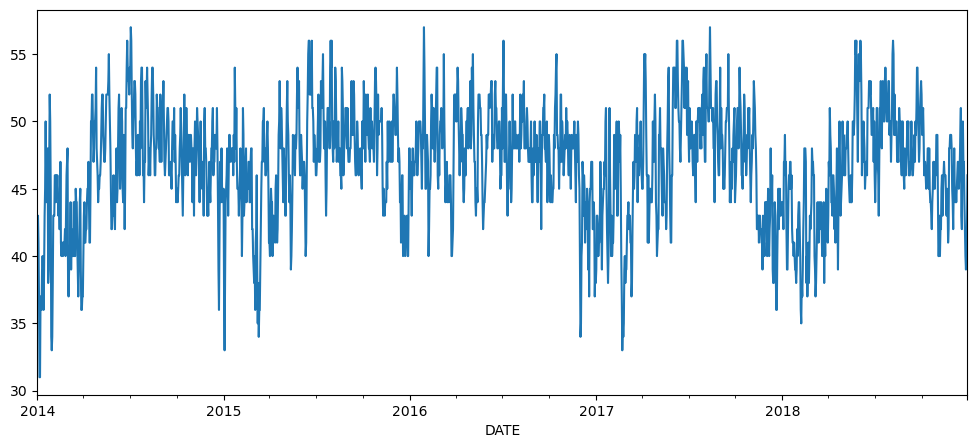

In [5]:
df.AvgTemp.plot(figsize=(12, 5))
plt.show()

In [4]:
# 
adfuller(df.AvgTemp)

(-6.601274820146715,
 6.7262533870256984e-09,
 12,
 1812,
 {'1%': -3.4339640110318004,
  '5%': -2.8631363845692475,
  '10%': -2.567619862152732},
 8162.723391649213)

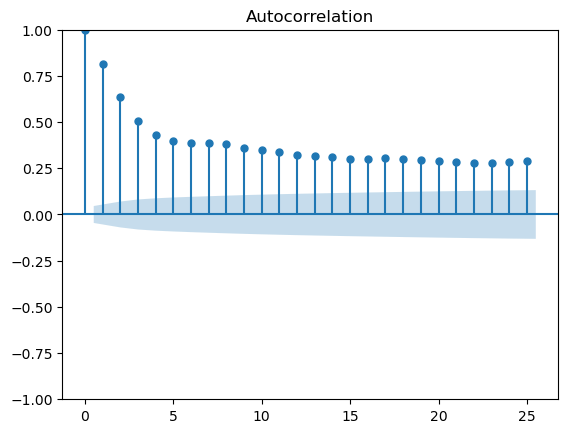

In [6]:
plot_acf(df.AvgTemp, lags=25)
plt.show()

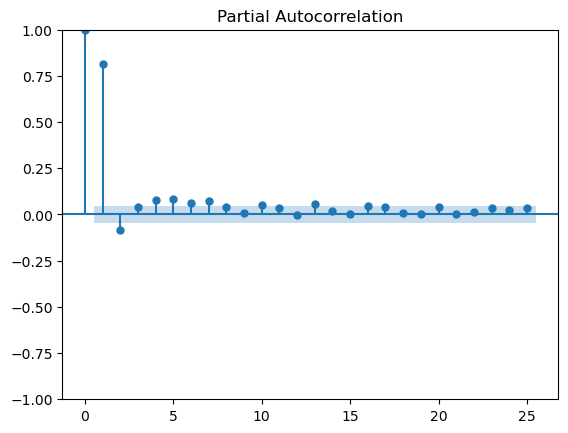

In [8]:
plot_pacf(df.AvgTemp, lags=25)
plt.show()

## Perform grid search to 

In [11]:
stepwise_fit = auto_arima(
    df.AvgTemp, start_p=0, start_q=0, max_p=6, max_q=6, seasonal=True, trace=True
)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10369.006, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8380.315, Time=0.38 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9152.451, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19234.227, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=8369.709, Time=0.40 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=8368.768, Time=1.04 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=8357.937, Time=1.50 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=8344.821, Time=2.72 sec
 ARIMA(6,0,0)(0,0,0)[0] intercept   : AIC=8339.118, Time=3.07 sec
 ARIMA(6,0,1)(0,0,0)[0] intercept   : AIC=8333.738, Time=12.11 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=8334.812, Time=14.74 sec
 ARIMA(6,0,2)(0,0,0)[0] intercept   : AIC=8332.051, Time=14.14 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=8326.513, Time=13.96 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=8323.839, Time=13.01 sec
 ARIMA(3,0,2)(0,0,0)[0] in

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1825
Model:               SARIMAX(1, 0, 6)   Log Likelihood               -4145.400
Date:                Thu, 15 Feb 2024   AIC                           8308.799
Time:                        14:52:17   BIC                           8358.383
Sample:                    01-01-2014   HQIC                          8327.090
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.0165      0.335      3.032      0.002       0.359       1.674
ar.L1          0.9782      0.007    135.611      0.000       0.964       0.992
ma.L1         -0.1375      0.023     -5.868      0.000      -0.183      -0.092
ma.L2         -0.2193      0.024     -9.148      0.000      -0.266      -0.172
ma.L3         -0.2039      0.024     -8.557      0.000      -0.251      -0.157
ma.L4         -0.1296      0.023     -5.626      0.000      -0.175      -0.084
ma.L5         -0.0508      0.025     -2.065      0.039      -0.099      -0.003
ma.L6         -0.0221      0.024     -0.936      0.349      -0.068       0.024
sigma2         5.5004      0.172     31.898      0.000       5.162       5.838
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                21.26
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
train, test = df.iloc[:-30], df.iloc[-30:]

model = ARIMA(train.AvgTemp, order=(1, 0, 5))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1795
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4077.524
Date:                Thu, 15 Feb 2024   AIC                           8171.048
Time:                        15:03:11   BIC                           8214.990
Sample:                    01-01-2014   HQIC                          8187.271
                         - 11-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5855      0.756     61.590      0.000      45.103      48.068
ar.L1          0.9856      0.005    188.257      0.000       0.975       0.996
ma.L1         -0.1400      0.023     -6.077      0.000      -0.185      -0.095
ma.L2         -0.2278      0.023     -9.700      0.000      -0.274      -0.182
ma.L3         -0.2147      0.023     -9.177      0.000      -0.261      -0.169
ma.L4         -0.1481      0.023     -6.514      0.000      -0.193      -0.104
ma.L5         -0.0614      0.024     -2.522      0.012      -0.109      -0.014
sigma2         5.4986      0.173     31.700      0.000       5.159       5.839
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                15.25
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
pred = results.predict(start=len(train), end=len(train) + len(test) - 1, typ="levels")
print(pred)

2018-12-01    44.750730
2018-12-02    44.983857
2018-12-03    45.377130
2018-12-04    45.710397
2018-12-05    45.857161
2018-12-06    45.867654
2018-12-07    45.877996
2018-12-08    45.888188
2018-12-09    45.898234
2018-12-10    45.908135
2018-12-11    45.917894
2018-12-12    45.927511
2018-12-13    45.936991
2018-12-14    45.946333
2018-12-15    45.955541
2018-12-16    45.964617
2018-12-17    45.973562
2018-12-18    45.982377
2018-12-19    45.991066
2018-12-20    45.999630
2018-12-21    46.008070
2018-12-22    46.016389
2018-12-23    46.024587
2018-12-24    46.032668
2018-12-25    46.040632
2018-12-26    46.048482
2018-12-27    46.056218
2018-12-28    46.063843
2018-12-29    46.071358
2018-12-30    46.078765
Freq: D, Name: predicted_mean, dtype: float64


/home/godwin/Desktop/Organised/python/python/timeSeriesPandas/.venv2/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


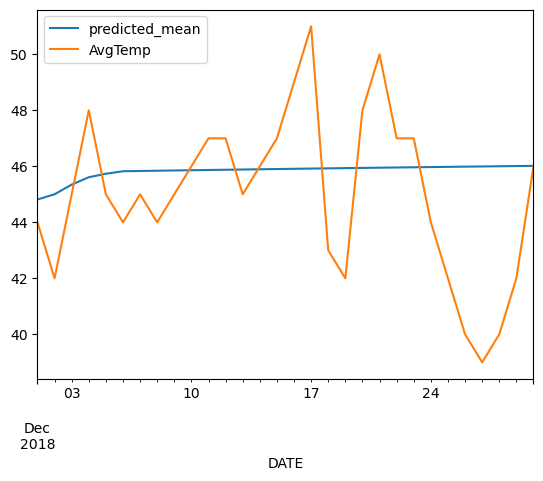

In [15]:
pred.plot(legend=True)
test.AvgTemp.plot(legend=True)
plt.show()

In [18]:
print("rms error:", np.sqrt(mean_squared_error(pred, test.AvgTemp)))

rms error: 2.999230749728908


In [ ]:
# fit model
m = prophet.Prophet()

df_p = {}
df_p["ds"] = df_temp.index
df_p["y"] = df_temp.Temp.values
df_p = pd.DataFrame(df_p)

train_p, test_p = df_p[:-7], df_p[-7:]

m.fit(train_p)

future = m.make_future_dataframe(periods=len(test_p) * 100)
forecast = m.predict(future)

# plot forecast
m.plot(forecast)
plt.show()

In [ ]:
m.plot_components(forecast)
plt.show()